In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
#先读取.ems文件，将其转化为excel

text_file = 'global.1751_2011.ems'  # 输入的文本文件路径
excel_file = 'global.1751_2011.xlsx'  # 输出的 Excel 文件路径

# 读取文本文件（空格分隔,跳过前33行的注释）
df = pd.read_csv(text_file, skiprows=33, delim_whitespace=True)  # 自动按空格分隔

# 查看前几行数据，确认读取成功
print(df.head())

# 保存为 Excel 文件
df.to_excel(excel_file, index=False)  # index=False 不保存行号
print(f"文件已保存为 {excel_file}")

   Year  Total  Gas  Liquids  Solids  Production  Flaring  Capita
0  1751      3    0        0       3           0        0     NaN
1  1752      3    0        0       3           0        0     NaN
2  1753      3    0        0       3           0        0     NaN
3  1754      3    0        0       3           0        0     NaN
4  1755      3    0        0       3           0        0     NaN
文件已保存为 global.1751_2011.xlsx


C:\Users\15484\AppData\Local\Temp\ipykernel_10072\3621143935.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(text_file, skiprows=33, delim_whitespace=True)  # 自动按空格分隔


In [167]:
#读取excel
data = pd.read_excel("global.1751_2011.xlsx") # 读取C排放excel
Carbon_emission =data.loc[(data['Year']>=1986)&(data['Year']<=2003)] #选取1986-2002
Carbon_emission.reset_index(drop=True, inplace=True)         #重置index
Carbon_emission       

,Year,Total,Gas,Liquids,Solids,Production,Flaring,Capita
0,1986,5606,830,2293,2300,137,46,1.13
1,1987,5750,892,2306,2364,143,44,1.14
2,1988,5963,935,2412,2414,152,50,1.16
3,1989,6094,982,2459,2457,156,41,1.17
4,1990,6121,1024,2491,2409,157,40,1.15
5,1991,6198,1050,2603,2340,161,44,1.15
6,1992,6136,1084,2500,2350,167,34,1.12
7,1993,6133,1117,2513,2291,176,36,1.10
8,1994,6241,1133,2535,2349,186,38,1.10
9,1995,6374,1152,2559,2430,197,36,1.11


In [169]:
#读取observed values at Mauna Loa
observe = pd.read_csv("co2_annmean_mlo.csv",skiprows=43)
observe_values = observe.loc[(observe['year']>=1986)&(observe['year']<=2004)] #选取1986-2003
observe_values.reset_index(drop=True, inplace=True)         #重置index
observe_values

,year,mean,unc
0,1986,347.61,0.12
1,1987,349.31,0.12
2,1988,351.69,0.12
3,1989,353.20,0.12
4,1990,354.45,0.12
5,1991,355.70,0.12
6,1992,356.54,0.12
7,1993,357.21,0.12
8,1994,358.96,0.12
9,1995,360.97,0.12


In [175]:
#1.1用公式1，2
# 定义参数
k12 = 105 / 740
k21 = 102 / 900
N1_1986 = 740  # 1986年大气C含量
N2_1986 = 900   # 1986年表面海水C含量
gamma = Carbon_emission['Total']/1000             #将百万吨转换为Pg，除以1000
N1 = [N1_1986]
N2 = [N2_1986]
for i in range (18):
    dN1 = -k12*N1[i]+k21*N2[i]+gamma[i]
    dN2 = k12*N1[i]-k21*N2[i]
    N1_new = N1[i]+dN1
    N2_new = N2[i]+dN2
    N1.append(N1_new)
    N2.append(N2_new)
C1 = [x / 2.13 for x in N1]  #没有buffer effect 的浓度ppm
C1

[347.4178403755869,
 348.64131455399064,
 349.9184177134881,
 351.27551872332936,
 352.6650357948939,
 354.0368395064885,
 355.4203615525229,
 356.7514499290922,
 358.067887657273,
 359.4253670037432,
 360.83089668030635,
 362.28727093361573,
 363.7660199873734,
 365.21323291510646,
 366.6366831013224,
 368.1257812499719,
 369.67260489591814,
 371.2228967794613,
 372.9434430803818]

In [177]:
#1.2用公式3,4
# 定义参数
k12 = 105 / 740
k21 = 102 / 900
N1_1986 = 740  # 1986年大气C含量
C2_1986 = N1_1986/2.13   # 1986年大气C浓度ppm
N2_1986 = 900   # 1986年表面海水C含量
N2_0 = 821      #N2_0
buffer_1986 = 3.69+1.86*0.01*C2_1986-1.8*10**(-6)*C2_1986**2   #计算buffer
print(buffer_1986)
gamma = Carbon_emission['Total']/1000             #将百万吨转换为Pg，除以1000

#建立list
N1 = [N1_1986]
N2 = [N2_1986]
C2 = [C2_1986]
buffer = [buffer_1986]

#每一年进行迭代
for i in range (18):
    dN1 = -k12*N1[i]+k21*(N2_0+buffer[i]*(N2[i]-N2_0))+gamma[i]
    dN2 = k12*N1[i]-k21*(N2_0+buffer[i]*(N2[i]-N2_0))
    N1_new = N1[i]+dN1
    N2_new = N2[i]+dN2
    C2_new = N1_new/2.13
    buffer_new = 3.69+1.86*0.01*C2_new-1.8*10**(-6)*C2_new**2   #计算buffer
    N1.append(N1_new)
    N2.append(N2_new)
    C2.append(C2_new)
    buffer.append(buffer_new)
C2

9.93471335052569


[347.4178403755869,
 386.19787176762446,
 378.9140192123671,
 384.60718381611724,
 386.2066379830428,
 389.1331622092833,
 391.6698314102274,
 394.31564325029115,
 396.92024874362767,
 399.59185505658473,
 402.3167927625224,
 405.11046928611944,
 407.9460024209478,
 410.7740638863696,
 413.6001242490764,
 416.50629371382973,
 419.4832614749899,
 422.4863349042799,
 425.68432053682614]

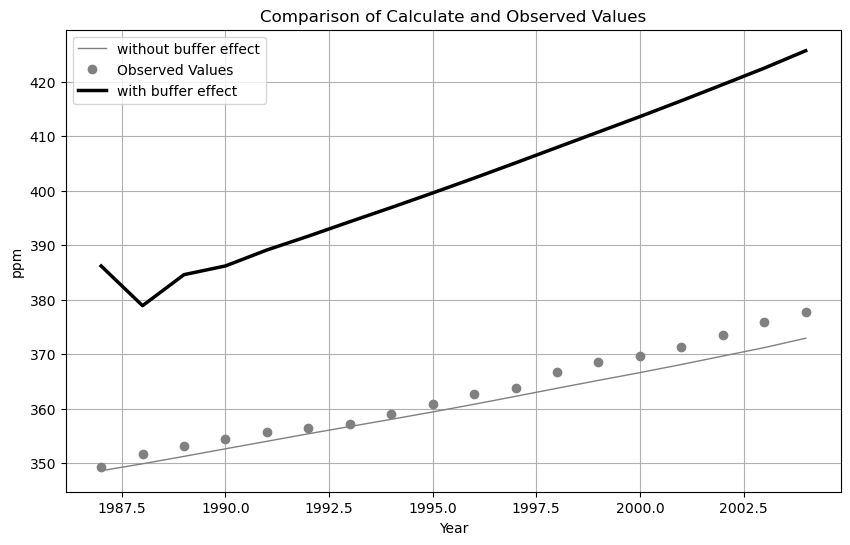

In [179]:
# 绘制图形1.3
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制 C1 的细实线,从1987-2004
plt.plot(observe_values['year'][1:], C1[1:], linestyle='-', linewidth=1, label='without buffer effect', color='gray')

# 绘制 observe_values 的点线
plt.plot(observe_values['year'][1:], observe_values['mean'][1:], linestyle='', marker='o', label='Observed Values', color='gray')

#绘制C2,粗实线
plt.plot(observe_values['year'][1:], C2[1:], linestyle='-', linewidth=2.5, label='with buffer effect', color='black')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title("Comparison of Calculate and Observed Values")
plt.xlabel("Year")
plt.ylabel("ppm")

# 显示网格
plt.grid(True)

# 显示图形
plt.show()
